# COGS 118A FINAL PROJECT 
### Matti Key - A16858681

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Load 3 Datasets & Clean Them

In [157]:
from ucimlrepo import fetch_ucirepo

### Bank Marketing

In [158]:
# importing the df from the UCI Database
bank_marketing = fetch_ucirepo(id=222)
bank_df = bank_marketing.data.features 
bank_y = bank_marketing.data.targets 


In [159]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


### Infrared Thermography Temperature

In [160]:
infrared_thermography_temperature = fetch_ucirepo(id=925) 
itt_df = infrared_thermography_temperature.data.features 
itt_y = infrared_thermography_temperature.data.targets 

In [161]:
itt_df.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


### Super Conductivity

In [162]:
superconductivty_data = fetch_ucirepo(id=464) 
super_df= superconductivty_data.data.features 
super_y = superconductivty_data.data.targets 

In [163]:
super_y.head()

,critical_temp
0,29.0
1,26.0
2,19.0
3,22.0
4,23.0


In [164]:
super_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809


---

### Clean the Data

In [165]:
def clean_data(df, y):
    # Remove duplicates
    # df = df.drop_duplicates()
    
    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))

    # Encode categorical features if present
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    # Standardize numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df, y


In [166]:
# apply the function to the datasets
bank_df_cleaned, bank_y_cleaned = clean_data(bank_df, bank_y)
itt_df_cleaned, itt_y_cleaned = clean_data(itt_df, itt_y)
super_df_cleaned, super_y_cleaned = clean_data(super_df, super_y)

### Standardize the Data

In [167]:
def categorize_oral_temp(row):
    if row['aveOralF'] > row['aveOralM']:
        return 0  # Female temperature higher
    elif row['aveOralF'] < row['aveOralM']:
        return 1  # Male temperature higher
    else:
        return 2  # Temperatures are equal

itt_y_multiclass = itt_y.apply(categorize_oral_temp, axis=1)

In [168]:
# Discretize the continuous target into classes
super_y_cleaned['discretized_target'] = pd.cut(
    super_y_cleaned['critical_temp'], 
    bins=5,  # Number of bins (adjust as needed)
    labels=[0, 1, 2, 3, 4]  # Labels for each bin
)

# Use the discretized target for classification
super_y_discrete = super_y_cleaned['discretized_target']

/var/folders/wy/w8y608sd3r1cfy1611kf8p500000gn/T/ipykernel_2616/2213678811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_y_cleaned['discretized_target'] = pd.cut(


In [169]:
# Encode string labels to integers
label_encoder = LabelEncoder()
bank_y_cleaned = label_encoder.fit_transform(bank_y_cleaned)

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Summarizing the Data

In [170]:
def summarize_data(df, y, name):
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    # print(f"Target Distribution: \n{pd.Series(y).value_counts()}")
    print("-"*50)

In [171]:
summarize_data(bank_df_cleaned, bank_y_cleaned, "Bank Marketing")
summarize_data(itt_df_cleaned, itt_y_cleaned, "Infrared Thermography Temperature")
summarize_data(super_df_cleaned, super_y_cleaned, "Superconductivity")

Dataset: Bank Marketing
Shape: (45211, 16)
--------------------------------------------------
Dataset: Infrared Thermography Temperature
Shape: (1020, 33)
--------------------------------------------------
Dataset: Superconductivity
Shape: (21263, 81)
--------------------------------------------------


In [172]:
def train_and_evaluate(X_train, X_test, y_train, y_test, classifier, param_grid, name):
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

    return metrics, grid_search.best_params_, grid_search.cv_results_

# 20/80

In [173]:
# Splitting the datasets into training and test sets
def split_data_20(df, y):
    return train_test_split(df, y, test_size=0.2, random_state=42)

In [174]:
bank_X_train_20, bank_X_test_20, bank_y_train_20, bank_y_test_20 = split_data_20(bank_df_cleaned, bank_y_cleaned)
itt_X_train_20, itt_X_test_20, itt_y_train_20, itt_y_test_20 = split_data_20(itt_df_cleaned, itt_y_multiclass)
super_X_train_20, super_X_test_20, super_y_train_20, super_y_test_20 = split_data_20(super_df_cleaned, super_y_discrete)

In [175]:
results_20 = {}

In [176]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
results_20['Random Forest - Bank Marketing'] = train_and_evaluate(bank_X_train_20, bank_X_test_20, bank_y_train_20, bank_y_test_20, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Bank Marketing")
results_20['Random Forest - Infrared Thermography'] = train_and_evaluate(itt_X_train_20, itt_X_test_20, itt_y_train_20, itt_y_test_20, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Infrared Thermography")
results_20['Random Forest - Superconductivity'] = train_and_evaluate(super_X_train_20, super_X_test_20, super_y_train_20, super_y_test_20, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Superconductivity")

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [184]:
# Support Vector Machine
svm_params = { 'C': [0.01, 0.1, 1, 10], 'max_iter': [1000, 5000, 10000] }
results_20['SVM - Bank Marketing'] = train_and_evaluate(bank_X_train_20, bank_X_test_20, bank_y_train_20, bank_y_test_20, LinearSVC(random_state=42), svm_params, "SVM - Bank Marketing")
results_20['SVM - Infrared Thermography'] = train_and_evaluate(itt_X_train_20, itt_X_test_20, itt_y_train_20, itt_y_test_20, LinearSVC(random_state=42), svm_params, "SVM - Infrared Thermography")
results_20['SVM - Superconductivity'] = train_and_evaluate(super_X_train_20, super_X_test_20, super_y_train_20, super_y_test_20, LinearSVC(random_state=42), svm_params, "SVM - Superconductivity")

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [191]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to integers
label_encoder = LabelEncoder()
bank_y_cleaned = label_encoder.fit_transform(bank_y_cleaned)

In [192]:
bank_X_train, bank_X_test, bank_y_train, bank_y_test = split_data_20(bank_df_cleaned, bank_y_cleaned)

In [193]:
# XGBoost
xgb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
results_20['XGBoost - Bank Marketing'] = train_and_evaluate(bank_X_train_20, bank_X_test_20, bank_y_train_20, bank_y_test_20, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Bank Marketing")
results_20['XGBoost - Infrared Thermography'] = train_and_evaluate(itt_X_train_20, itt_X_test_20, itt_y_train_20, itt_y_test_20, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Infrared Thermography")
results_20['XGBoost - Superconductivity'] = train_and_evaluate(super_X_train_20, super_X_test_20, super_y_train_20, super_y_test_20, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Superconductivity")

/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:52:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

In [196]:
results_20['XGBoost - Superconductivity'][0]

{'accuracy': 0.8932518222431225,
 'precision': 0.8931823219601713,
 'recall': 0.8932518222431225,
 'f1': 0.8930149177424522}

# 50/50

In [47]:
# Splitting the datasets into training and test sets
def split_data_50(df, y):
    return train_test_split(df, y, test_size=0.5, random_state=42)

In [48]:
bank_X_train_50, bank_X_test_50, bank_y_train_50, bank_y_test_50 = split_data_50(bank_df_cleaned, bank_y_cleaned)
itt_X_train_50, itt_X_test_50, itt_y_train_50, itt_y_test_50 = split_data_50(itt_df_cleaned, itt_y_multiclass)
super_X_train_50, super_X_test_50, super_y_train_50, super_y_test_50 = split_data_50(super_df_cleaned, super_y_discrete)

In [49]:
results_50 = {}

In [50]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
results_50['Random Forest - Bank Marketing'] = train_and_evaluate(bank_X_train_50, bank_X_test_50, bank_y_train_50, bank_y_test_50, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Bank Marketing")
results_50['Random Forest - Infrared Thermography'] = train_and_evaluate(itt_X_train_50, itt_X_test_50, itt_y_train_50, itt_y_test_50, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Infrared Thermography")
results_50['Random Forest - Superconductivity'] = train_and_evaluate(super_X_train_50, super_X_test_50, super_y_train_50, super_y_test_50, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Superconductivity")

Training and Evaluating: Random Forest - Bank Marketing
Best Parameters for Random Forest - Bank Marketing: {'max_depth': 20, 'n_estimators': 150}
Metrics for Random Forest - Bank Marketing: {'accuracy': 0.904007785543661, 'precision': 0.8923945401728736, 'recall': 0.904007785543661, 'f1': 0.895034718439993}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     19945
           1       0.64      0.42      0.51      2661

    accuracy                           0.90     22606
   macro avg       0.78      0.69      0.73     22606
weighted avg       0.89      0.90      0.90     22606

--------------------------------------------------
Training and Evaluating: Random Forest - Infrared Thermography
Best Parameters for Random Forest - Infrared Thermography: {'max_depth': 10, 'n_estimators': 50}
Metrics for Random Forest - Infrared Thermography: {'accuracy': 0.6058823529411764, 'precision': 0.6026865598630305, 'recall': 0.6058823529411764, 'f1':

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Support Vector Machine
svm_params = { 'C': [0.01, 0.1, 1, 10], 'max_iter': [1000, 5000, 10000] }
results_50['SVM - Bank Marketing'] = train_and_evaluate(bank_X_train_50, bank_X_test_50, bank_y_train_50, bank_y_test_50, LinearSVC(random_state=42), svm_params, "SVM - Bank Marketing")
results_50['SVM - Infrared Thermography'] = train_and_evaluate(itt_X_train_50, itt_X_test_50, itt_y_train_50, itt_y_test_50, LinearSVC(random_state=42), svm_params, "SVM - Infrared Thermography")
results_50['SVM - Superconductivity'] = train_and_evaluate(super_X_train_50, super_X_test_50, super_y_train_50, super_y_test_50, LinearSVC(random_state=42), svm_params, "SVM - Superconductivity")

Training and Evaluating: SVM - Bank Marketing
Best Parameters for SVM - Bank Marketing: {'C': 0.1, 'max_iter': 1000}
Metrics for SVM - Bank Marketing: {'accuracy': 0.8876846854817305, 'precision': 0.8607609971357494, 'recall': 0.8876846854817305, 'f1': 0.8566851589793051}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19945
           1       0.59      0.15      0.24      2661

    accuracy                           0.89     22606
   macro avg       0.74      0.57      0.59     22606
weighted avg       0.86      0.89      0.86     22606

--------------------------------------------------
Training and Evaluating: SVM - Infrared Thermography
Best Parameters for SVM - Infrared Thermography: {'C': 1, 'max_iter': 1000}
Metrics for SVM - Infrared Thermography: {'accuracy': 0.615686274509804, 'precision': 0.6130347881087919, 'recall': 0.6156862745098038, 'f1': 0.611909949164851}
              precision    recall  f1-score   support

    

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters for SVM - Superconductivity: {'C': 10, 'max_iter': 5000}
Metrics for SVM - Superconductivity: {'accuracy': 0.8153686982693755, 'precision': 0.8162179731803763, 'recall': 0.8153686982693755, 'f1': 0.8123795672028525}
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6875
           1       0.51      0.39      0.44      1642
           2       0.63      0.81      0.71      1926
           3       0.65      0.71      0.68       188
           4       0.00      0.00      0.00         1

    accuracy                           0.82     10632
   macro avg       0.55      0.57      0.55     10632
weighted avg       0.82      0.82      0.81     10632

--------------------------------------------------


/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
# XGBoost
xgb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
results_50['XGBoost - Bank Marketing'] = train_and_evaluate(bank_X_train_50, bank_X_test_50, bank_y_train_50, bank_y_test_50, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Bank Marketing")
results_50['XGBoost - Infrared Thermography'] = train_and_evaluate(itt_X_train_50, itt_X_test_50, itt_y_train_50, itt_y_test_50, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Infrared Thermography")
results_50['XGBoost - Superconductivity'] = train_and_evaluate(super_X_train_50, super_X_test_50, super_y_train_50, super_y_test_50, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Superconductivity")

Training and Evaluating: XGBoost - Bank Marketing


/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best Parameters for XGBoost - Bank Marketing: {'learning_rate': 0.1, 'n_estimators': 150}
Metrics for XGBoost - Bank Marketing: {'accuracy': 0.9049809785012829, 'precision': 0.8954750761063742, 'recall': 0.9049809785012829, 'f1': 0.8983902647360222}
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     19945
           1       0.63      0.46      0.53      2661

    accuracy                           0.90     22606
   macro avg       0.78      0.71      0.74     22606
weighted avg       0.90      0.90      0.90     22606

--------------------------------------------------
Training and Evaluating: XGBoost - Infrared Thermography


/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best Parameters for XGBoost - Infrared Thermography: {'learning_rate': 0.2, 'n_estimators': 50}
Metrics for XGBoost - Infrared Thermography: {'accuracy': 0.6333333333333333, 'precision': 0.6312250712250712, 'recall': 0.6333333333333333, 'f1': 0.6288863174717265}
              precision    recall  f1-score   support

           0       0.62      0.52      0.56       232
           1       0.64      0.73      0.68       278

    accuracy                           0.63       510
   macro avg       0.63      0.62      0.62       510
weighted avg       0.63      0.63      0.63       510

--------------------------------------------------
Training and Evaluating: XGBoost - Superconductivity


/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best Parameters for XGBoost - Superconductivity: {'learning_rate': 0.2, 'n_estimators': 150}
Metrics for XGBoost - Superconductivity: {'accuracy': 0.8825244544770504, 'precision': 0.8815733518422175, 'recall': 0.8825244544770504, 'f1': 0.8818141068900142}
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6875
           1       0.68      0.64      0.66      1642
           2       0.80      0.84      0.82      1926
           3       0.76      0.78      0.77       188
           4       0.00      0.00      0.00         1

    accuracy                           0.88     10632
   macro avg       0.64      0.64      0.64     10632
weighted avg       0.88      0.88      0.88     10632

--------------------------------------------------


/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 80/20

In [54]:
# Splitting the datasets into training and test sets
def split_data_80(df, y):
    return train_test_split(df, y, test_size=0.5, random_state=42)

In [55]:
bank_X_train_80, bank_X_test_80, bank_y_train_80, bank_y_test_80 = split_data_80(bank_df_cleaned, bank_y_cleaned)
itt_X_train_80, itt_X_test_80, itt_y_train_80, itt_y_test_80 = split_data_80(itt_df_cleaned, itt_y_multiclass)
super_X_train_80, super_X_test_80, super_y_train_80, super_y_test_80 = split_data_80(super_df_cleaned, super_y_discrete)

In [56]:
results_80 = {}

In [57]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
results_80['Random Forest - Bank Marketing'] = train_and_evaluate(bank_X_train_80, bank_X_test_80, bank_y_train_80, bank_y_test_80, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Bank Marketing")
results_80['Random Forest - Infrared Thermography'] = train_and_evaluate(itt_X_train_80, itt_X_test_80, itt_y_train_80, itt_y_test_80, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Infrared Thermography")
results_80['Random Forest - Superconductivity'] = train_and_evaluate(super_X_train_80, super_X_test_80, super_y_train_80, super_y_test_80, RandomForestClassifier(random_state=42), rf_params, "Random Forest - Superconductivity")

Training and Evaluating: Random Forest - Bank Marketing
Best Parameters for Random Forest - Bank Marketing: {'max_depth': 20, 'n_estimators': 150}
Metrics for Random Forest - Bank Marketing: {'accuracy': 0.904007785543661, 'precision': 0.8923945401728736, 'recall': 0.904007785543661, 'f1': 0.895034718439993}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     19945
           1       0.64      0.42      0.51      2661

    accuracy                           0.90     22606
   macro avg       0.78      0.69      0.73     22606
weighted avg       0.89      0.90      0.90     22606

--------------------------------------------------
Training and Evaluating: Random Forest - Infrared Thermography
Best Parameters for Random Forest - Infrared Thermography: {'max_depth': 10, 'n_estimators': 50}
Metrics for Random Forest - Infrared Thermography: {'accuracy': 0.6058823529411764, 'precision': 0.6026865598630305, 'recall': 0.6058823529411764, 'f1':

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# Support Vector Machine
svm_params = { 'C': [0.01, 0.1, 1, 10], 'max_iter': [1000, 5000, 10000] }
results_80['SVM - Bank Marketing'] = train_and_evaluate(bank_X_train_80, bank_X_test_80, bank_y_train_80, bank_y_test_80, LinearSVC(random_state=42), svm_params, "SVM - Bank Marketing")
results_80['SVM - Infrared Thermography'] = train_and_evaluate(itt_X_train_80, itt_X_test_80, itt_y_train_80, itt_y_test_80, LinearSVC(random_state=42), svm_params, "SVM - Infrared Thermography")
results_80['SVM - Superconductivity'] = train_and_evaluate(super_X_train_80, super_X_test_80, super_y_train_80, super_y_test_80, LinearSVC(random_state=42), svm_params, "SVM - Superconductivity")

Training and Evaluating: SVM - Bank Marketing
Best Parameters for SVM - Bank Marketing: {'C': 0.1, 'max_iter': 1000}
Metrics for SVM - Bank Marketing: {'accuracy': 0.8876846854817305, 'precision': 0.8607609971357494, 'recall': 0.8876846854817305, 'f1': 0.8566851589793051}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     19945
           1       0.59      0.15      0.24      2661

    accuracy                           0.89     22606
   macro avg       0.74      0.57      0.59     22606
weighted avg       0.86      0.89      0.86     22606

--------------------------------------------------
Training and Evaluating: SVM - Infrared Thermography
Best Parameters for SVM - Infrared Thermography: {'C': 1, 'max_iter': 1000}
Metrics for SVM - Infrared Thermography: {'accuracy': 0.615686274509804, 'precision': 0.6130347881087919, 'recall': 0.6156862745098038, 'f1': 0.611909949164851}
              precision    recall  f1-score   support

    

/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters for SVM - Superconductivity: {'C': 10, 'max_iter': 5000}
Metrics for SVM - Superconductivity: {'accuracy': 0.8153686982693755, 'precision': 0.8162179731803763, 'recall': 0.8153686982693755, 'f1': 0.8123795672028525}
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      6875
           1       0.51      0.39      0.44      1642
           2       0.63      0.81      0.71      1926
           3       0.65      0.71      0.68       188
           4       0.00      0.00      0.00         1

    accuracy                           0.82     10632
   macro avg       0.55      0.57      0.55     10632
weighted avg       0.82      0.82      0.81     10632

--------------------------------------------------


/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mattikey/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
# XGBoost
xgb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
results_80['XGBoost - Bank Marketing'] = train_and_evaluate(bank_X_train_80, bank_X_test_80, bank_y_train_80, bank_y_test_80, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Bank Marketing")
results_80['XGBoost - Infrared Thermography'] = train_and_evaluate(itt_X_train_80, itt_X_test_80, itt_y_train_80, itt_y_test_80, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Infrared Thermography")
results_80['XGBoost - Superconductivity'] = train_and_evaluate(super_X_train_80, super_X_test_80, super_y_train_80, super_y_test_80, XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_params, "XGBoost - Superconductivity")

/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

In [199]:
results_80['XGBoost - Superconductivity'][0]

{'accuracy': 0.8825244544770504,
 'precision': 0.8815733518422175,
 'recall': 0.8825244544770504,
 'f1': 0.8818141068900142}

# Visualizations

/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

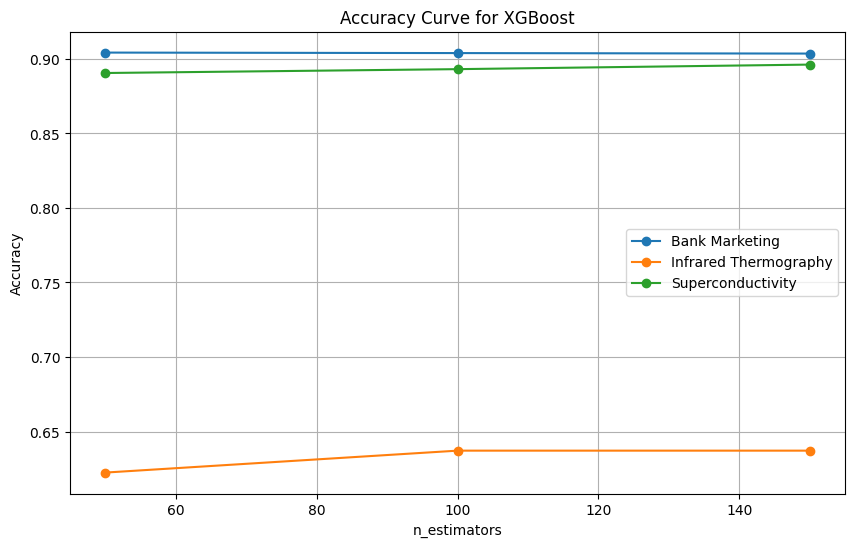

In [201]:
# Function to train and evaluate a model for a specific hyperparameter
def train_and_evaluate_accuracy(X_train, X_test, y_train, y_test, param_name, param_values, base_model):
    results = []
    for value in param_values:
        params = {param_name: value}
        model = base_model.set_params(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((value, accuracy))
    return pd.DataFrame(results, columns=[param_name, 'accuracy'])

# Example dataset and model
param_name = 'n_estimators'
param_values = [50, 100, 150]
base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Collect results for each dataset
bank_results = train_and_evaluate_accuracy(bank_X_train_20, bank_X_test_20, bank_y_train_20, bank_y_test_20, param_name, param_values, base_model)
itt_results = train_and_evaluate_accuracy(itt_X_train_20, itt_X_test_20, itt_y_train_20, itt_y_test_20, param_name, param_values, base_model)
super_results = train_and_evaluate_accuracy(super_X_train_20, super_X_test_20, super_y_train_20, super_y_test_20, param_name, param_values, base_model)

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(bank_results[param_name], bank_results['accuracy'], label='Bank Marketing', marker='o')
plt.plot(itt_results[param_name], itt_results['accuracy'], label='Infrared Thermography', marker='o')
plt.plot(super_results[param_name], super_results['accuracy'], label='Superconductivity', marker='o')

plt.xlabel(param_name)
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/mattikey/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [01:32:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

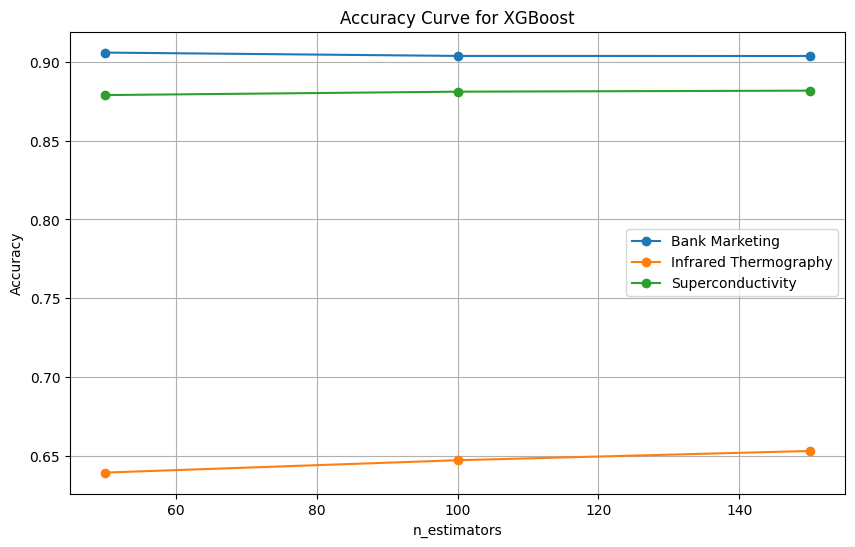

In [202]:

# Function to train and evaluate a model for a specific hyperparameter
def train_and_evaluate_accuracy(X_train, X_test, y_train, y_test, param_name, param_values, base_model):
    results = []
    for value in param_values:
        params = {param_name: value}
        model = base_model.set_params(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((value, accuracy))
    return pd.DataFrame(results, columns=[param_name, 'accuracy'])

# Example dataset and model
param_name = 'n_estimators'
param_values = [50, 100, 150]
base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Collect results for each dataset
bank_results = train_and_evaluate_accuracy(bank_X_train_50, bank_X_test_50, bank_y_train_50, bank_y_test_50, param_name, param_values, base_model)
itt_results = train_and_evaluate_accuracy(itt_X_train_50, itt_X_test_50, itt_y_train_50, itt_y_test_50, param_name, param_values, base_model)
super_results = train_and_evaluate_accuracy(super_X_train_50, super_X_test_50, super_y_train_50, super_y_test_50, param_name, param_values, base_model)

# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(bank_results[param_name], bank_results['accuracy'], label='Bank Marketing', marker='o')
plt.plot(itt_results[param_name], itt_results['accuracy'], label='Infrared Thermography', marker='o')
plt.plot(super_results[param_name], super_results['accuracy'], label='Superconductivity', marker='o')

plt.xlabel(param_name)
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


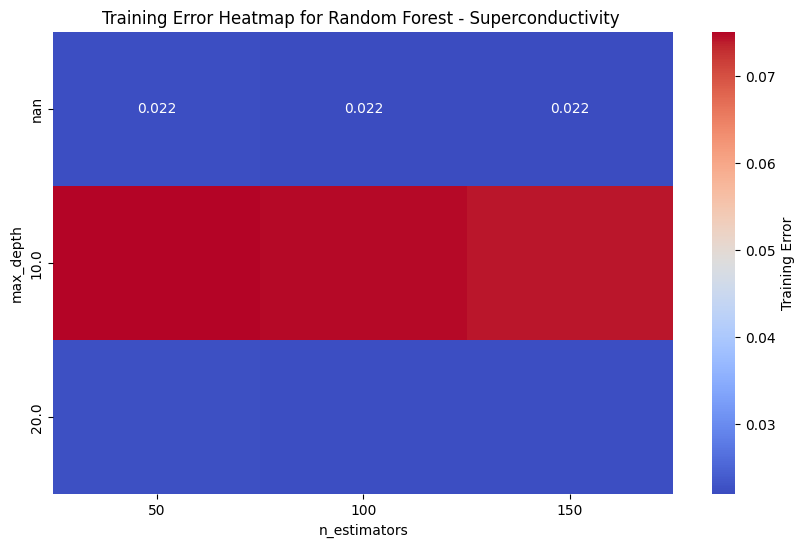

In [ ]:
# Function to calculate training error for different hyperparameter combinations
def training_error_heatmap(X_train, y_train, param_grid, base_model):
    results = []
    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            model = base_model.set_params(n_estimators=n_estimators, max_depth=max_depth)
            model.fit(X_train, y_train)
            y_pred_train = model.predict(X_train)
            training_error = 1 - accuracy_score(y_train, y_pred_train)
            results.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'training_error': training_error})
    return pd.DataFrame(results)

# Example hyperparameter grid
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
base_model = RandomForestClassifier(random_state=42)

# Generate heatmap data for a dataset
super_training_errors = training_error_heatmap(super_X_train_80, super_y_train_80, rf_params, base_model)

# Pivot the DataFrame to prepare for heatmap
heatmap_data = super_training_errors.pivot(index='max_depth', columns='n_estimators', values='training_error')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Training Error'})
plt.title('Training Error Heatmap for Random Forest - Superconductivity ')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()
